In [82]:
import numpy as np
import matplotlib.pyplot as plt

In [83]:
def xy_a_s(x, y, L):
    return y * L + x

def s_a_xy(s, L):
    return s % L, s // L

def vecino(s, j, L, empty):
    if j == 0:  
        if s % L == L - 1:
            return empty
        else:
            return s + 1
    elif j == 1:  
        if s // L == L - 1:
            return empty
        else:
            return s + L
    elif j == 2:  
        if s % L == 0:
            return empty
        else:
            return s - 1
    elif j == 3:  
        if s // L == 0:
            return empty
        else:
            return s - L

def boundaries(L, N, empty):
    nn = np.zeros((N, 4), dtype=int)
    for s in range(N):
        for j in range(4):
            nn[s, j] = vecino(s, j, L, empty)
    return nn

In [84]:
def HLA(L, N, p, nn, empty):
    site = np.zeros(N, dtype=np.short)
    
    xseed, yseed = L // 2, L // 2
    sseed = xy_a_s(xseed, yseed, L)
    site[sseed] = 1  
    cluster = np.array([sseed])
    
    per = np.array([nn[sseed, j] for j in range(4) if nn[sseed, j] != empty], dtype=int)
    site[per] = 2  
    
    while len(per) > 0:
        index = np.random.randint(len(per))
        snew = per[index]
        per = np.delete(per, index)
        escPer = np.random.random()
        if escPer < p:
            site[snew] = 1  
            cluster = np.append(cluster, snew)
            for j in range(4):
                sper = nn[snew, j]
                if sper != empty and site[sper] == 0:
                    per = np.append(per, sper)
                    site[sper] = 2  
        else:
            site[snew] = empty
        
    return site, cluster

[[  1  16  -1  -1]
 [  2  17   0  -1]
 [  3  18   1  -1]
 ...
 [254  -1 252 237]
 [255  -1 253 238]
 [ -1  -1 254 239]]
[136 135 151 167 134 133 168 149 183 182 198 181 214 197 180 215 231 179
 213 212 216 217 229 201 202 233 200]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1
 -1  0  0  0  0  0  0  0  0  0  0  0 -1  1  1  1  1 -1  0  0  0  0  0  0
  0  0  0  0 -1  1 -1  1 -1  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1  1
  1 -1  0  0  0  0  0  0  0  0 -1  1  1  1  1  1 -1 -1 -1  0  0  0  0  0
  0  0  0 -1 -1  1  1 -1  1  1  1 -1  0  0  0  0  0  0  0 -1  1  1  1  1
  1  1 -1  0  0  0  0  0  0  0  0  0 -1  1 -1  1 -1  1 -1  0  0  0  0  0
  0  0  0  0  0 -1  0 -1  0 -1  0  0  0

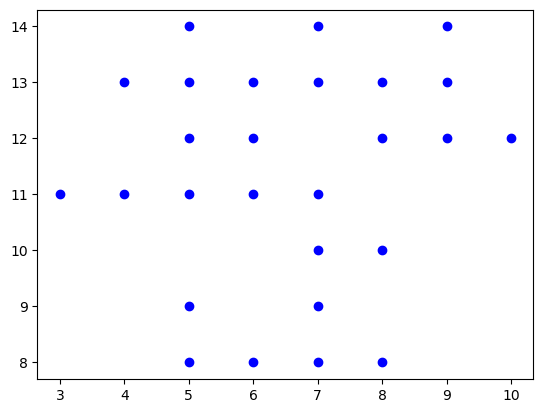

In [85]:
L = 16
p = 0.59275
N = L * L
empty = -1

nn = boundaries(L, N, empty)

site, cluster = HLA(L, N, p, nn, empty)

print(nn)
print(cluster)
print(site)

ncluster = np.array([s_a_xy(s, L) for s in cluster])

fig, ax = plt.subplots()
ax.plot(ncluster[:, 0], ncluster[:, 1], 'bo')
plt.show()


/var/folders/yv/xkr121fn6sg196g8ytf0bq3m0000gn/T/ipykernel_74556/929198595.py:4: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = plt.Rectangle((x, y), 1, 1, color='r', edgecolor='k')


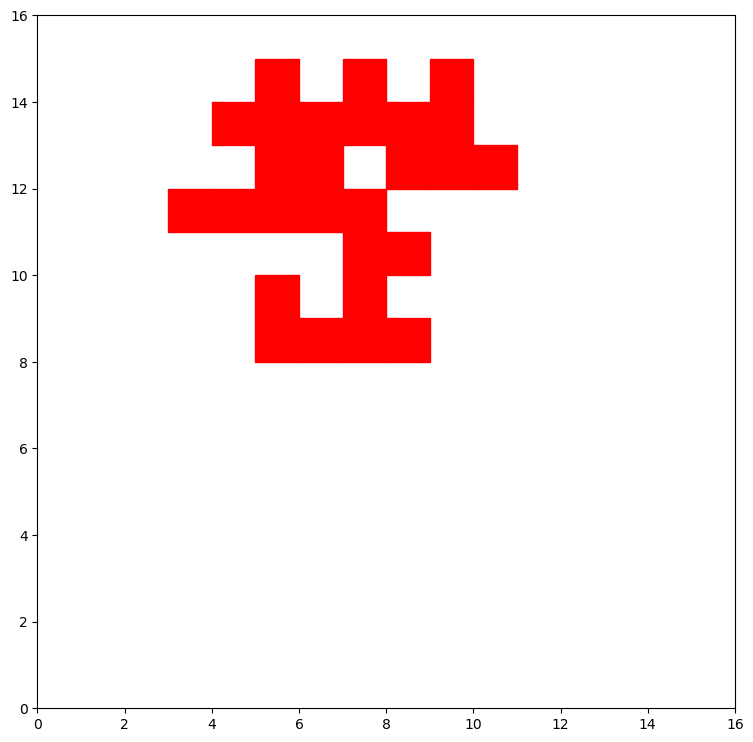

In [86]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(1,1,1)
for x, y in ncluster:
    rect = plt.Rectangle((x, y), 1, 1, color='r', edgecolor='k')
    ax.add_patch(rect)

plt.xlim(0, L)
plt.ylim(0, L)
plt.show()

In [87]:
def MassDist(L, cluster):
    # Convert cluster indices to 2D coordinates
    cluster_coords = np.array([s_a_xy(s, L) for s in cluster])
    xCluster, yCluster = cluster_coords[:, 0], cluster_coords[:, 1]
    
    Ncluster = xCluster.size
    xcm = xCluster[:Ncluster].mean()
    ycm = yCluster[:Ncluster].mean()
    dx = xCluster[:Ncluster] - xcm
    dy = yCluster[:Ncluster] - ycm
    dr = np.sqrt(dx*dx + dy*dy)
    massinside = []
    r = []
    imax = int(np.log2(L))
    for i in range(1, imax):
        massinside.append(dr[dr < (2**i)].size)
        r.append(2**i)
    return np.array(r), np.array(massinside)

In [88]:
r, M = MassDist(L,cluster)

In [89]:
def lineFit(x, y):
    xavg = x.mean()
    slope = (y * (x - xavg)).sum() / (x * (x - xavg)).sum()
    yint = y.mean() - slope * xavg
    return slope, yint

In [90]:
slope, corte = lineFit(np.log(r),np.log(M))
error = np.abs((slope-1.89)/1.89)*100

In [91]:
print('dimension fractal = {}, error = {} %'.format(round(slope,2),round(error,1)))

dimension fractal = 0.72, error = 62.1 %


Text(2, 24.3, '$d_f =$ 0.72')

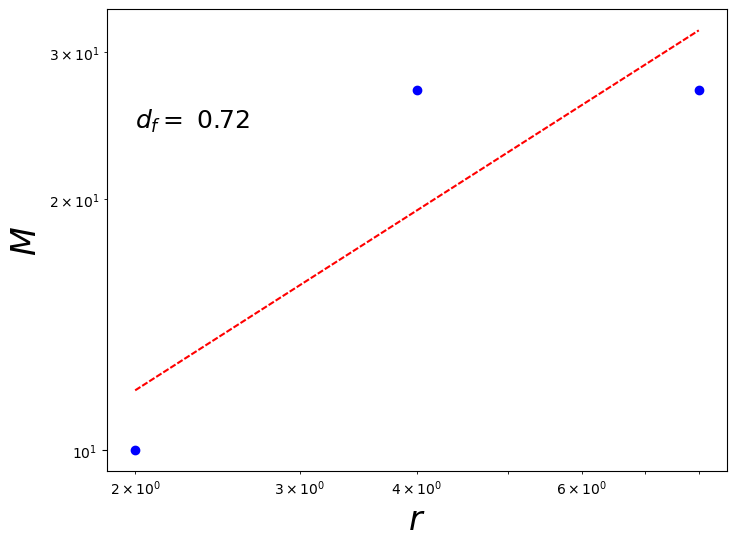

In [92]:
plt.figure(figsize=(8,6))
plt.loglog(r,M,'bo')
plt.plot(r,np.exp(corte)*r**slope,color = 'red',dashes = (3,1))
plt.xlabel(r'$r$',fontsize = 24)
plt.ylabel(r'$M$',fontsize = 24)
plt.text(r.min(),0.9*M.max(),r'$d_f =$ {}'.format(round(slope,2)),fontsize = 18)